<a href="https://www.kaggle.com/code/lalit7881/qs-rankings-2026-ml-analysis-96-75-accuracy?scriptVersionId=293604871" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qs-world-university-rankings-2026-top-1500/2026_QS_World University_Rankings.csv


## QS World University Rankings 2026 (Top 1500): ML Classification with 96.75% Accuracy

## Description

The QS World University Rankings 2026 – Top 1500 dataset was analyzed using a comprehensive machine learning classification pipeline to evaluate how well institutional performance indicators predict university ranking categories. The dataset includes key academic, research, internationalization, employment, and sustainability metrics such as Academic Reputation, Employer Reputation, Citations per Faculty, Faculty–Student Ratio, International Research Network, and Sustainability Score.

After thorough data cleaning, label encoding, feature scaling, and an 80–20 train–test split, multiple machine learning algorithms were applied and evaluated based on classification accuracy. Logistic Regression emerged as the best-performing model, achieving an accuracy of 96.75%, demonstrating a strong linear relationship between QS scoring indicators and ranking categories. Support Vector Machine (SVM) followed with 91.56% accuracy, showing robust performance in high-dimensional feature space. Ensemble-based Random Forest achieved 88.31% accuracy, while Naive Bayes (85.06%), Decision Tree (83.12%), and K-Nearest Neighbors (80.52%) showed comparatively lower but consistent performance.

These results indicate that QS ranking scores are highly predictive of university rank categories, with simpler linear models outperforming more complex algorithms in this case. The analysis highlights the strong influence of reputation, research impact, and employment outcomes on global university rankings and demonstrates the effectiveness of machine learning techniques in higher education analytics.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/qs-world-university-rankings-2026-top-1500/2026_QS_World University_Rankings.csv")

In [3]:
df.head()

,Rank,Previous Rank,Name,Country/Territory,Region,Size,Focus,Research,Status,Academic Reputation SCORE,...,International student RANK,International Students Diversity SCORE,International Students Diversity RANK,International Research Network SCORE,International Research Network RANK,Employment Outcomes SCORE,Employment Outcomes RANK,Sustainability SCORE,Sustainability RANK,Overall SCORE
0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,Private not for Profit,100.0,...,153.0,92.3,130.0,94.1,98.0,100.0,7,93.8,33,100
1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,Public,99.6,...,35.0,100.0,22.0,97.5,28.0,95.9,68,98.3,7=,99.4
2,3,6,Stanford University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,261.0,76.1,230.0,96.5,49.0,100.0,2,95.4,19=,98.9
3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,Public,100.0,...,80.0,98.7,67.0,100.0,1.0,100.0,3,77.9,198=,97.9
4,5,4,Harvard University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,217.0,60.6,335.0,99.4,8.0,100.0,1,77.8,201=,97.7


In [4]:
df.tail()

,Rank,Previous Rank,Name,Country/Territory,Region,Size,Focus,Research,Status,Academic Reputation SCORE,...,International student RANK,International Students Diversity SCORE,International Students Diversity RANK,International Research Network SCORE,International Research Network RANK,Employment Outcomes SCORE,Employment Outcomes RANK,Sustainability SCORE,Sustainability RANK,Overall SCORE
1499,1401,1201-1400,University of West Bohemia,Czechia,Europe,M,CO,VH,Public,7.2,...,801.0,4.8,801.0,40.9,801.0,15.5,801,19.5,801,-
1500,1401,1201-1400,Voronezh State University,Russian Federation,Europe,L,CO,HI,Public,5.7,...,546.0,40.2,502.0,12.2,801.0,3.5,801,20.4,801,-
1501,1401,NaN,Walailak University,Thailand,Asia,L,FC,MD,Public,8.3,...,801.0,7.4,801.0,31.5,801.0,3.2,801,43.0,801,-
1502,1401,1201-1400,Yamaguchi University,Japan,Asia,M,FC,HI,Public,4.4,...,801.0,8.9,801.0,15.4,801.0,1.7,801,22.5,801,-
1503,1401,1201-1400,Youngsan University,Republic of Korea,Asia,M,SP,MD,Private for Profit,6.5,...,658.0,24.7,689.0,2.5,801.0,1.9,801,11.5,801,-


In [5]:
df.describe()

,Academic Reputation SCORE,Academic Reputation RANK,Employer Reputation SCORE,Employer Reputation RANK,Faculty Student Ratio SCORE,Faculty Student Ratio RANK,Citations per Faculty SCORE,Citations per Faculty RANK,International Faculty SCORE,International Student SCORE,International student RANK,International Students Diversity SCORE,International Students Diversity RANK,International Research Network SCORE,International Research Network RANK,Employment Outcomes SCORE,Employment Outcomes RANK,Sustainability SCORE
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1417.000000,1467.000000,1467.000000,1467.000000,1467.000000,1502.000000,1502.000000,1504.000000,1504.000000,1480.000000
mean,25.753391,537.868351,26.908378,537.893617,33.988497,588.324468,30.476862,587.119681,36.265984,33.334628,582.668712,34.534560,582.769598,53.350067,587.480027,29.934840,589.845080,51.230068
std,24.487338,222.718491,25.492280,222.734851,28.444370,262.003171,29.717867,261.814708,35.230290,32.766158,262.935739,31.128186,262.981019,28.906493,261.509398,29.194258,261.614483,21.255581
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,8.775000,376.750000,8.500000,376.750000,10.800000,375.750000,6.000000,374.750000,6.600000,5.950000,366.500000,8.700000,366.500000,27.450000,376.250000,6.175000,379.750000,35.700000
50%,16.000000,701.000000,16.400000,701.000000,23.600000,759.500000,18.050000,750.500000,20.100000,19.400000,738.000000,21.700000,738.000000,55.800000,751.500000,17.850000,762.500000,48.700000
75%,32.550000,701.000000,37.350000,701.000000,50.525000,801.000000,50.025000,801.000000,66.100000,56.700000,801.000000,55.700000,801.000000,78.400000,801.000000,45.850000,801.000000,66.425000
max,100.000000,701.000000,100.000000,701.000000,100.000000,801.000000,100.000000,801.000000,100.000000,100.000000,801.000000,100.000000,801.000000,100.000000,801.000000,100.000000,801.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Rank                                    1504 non-null   object 
 1   Previous Rank                           1389 non-null   object 
 2   Name                                    1504 non-null   object 
 3   Country/Territory                       1504 non-null   object 
 4   Region                                  1504 non-null   object 
 5   Size                                    1503 non-null   object 
 6   Focus                                   1504 non-null   object 
 7   Research                                1503 non-null   object 
 8   Status                                  1456 non-null   object 
 9   Academic Reputation SCORE               1504 non-null   float64
 10  Academic Reputation  RANK               1504 non-null   int6

In [7]:
df.dtypes

Rank                                       object
Previous Rank                              object
Name                                       object
Country/Territory                          object
Region                                     object
Size                                       object
Focus                                      object
Research                                   object
Status                                     object
Academic Reputation SCORE                 float64
Academic Reputation  RANK                   int64
Employer Reputation SCORE                 float64
Employer Reputation RANK                    int64
Faculty Student Ratio SCORE               float64
Faculty Student Ratio RANK                  int64
Citations per Faculty SCORE               float64
Citations per Faculty RANK                  int64
International Faculty  SCORE              float64
International Faculty  RANK                object
International Student SCORE               float64


In [8]:
df.shape

(1504, 30)

In [9]:
df.isnull().sum()

Rank                                        0
Previous Rank                             115
Name                                        0
Country/Territory                           0
Region                                      0
Size                                        1
Focus                                       0
Research                                    1
Status                                     48
Academic Reputation SCORE                   0
Academic Reputation  RANK                   0
Employer Reputation SCORE                   0
Employer Reputation RANK                    0
Faculty Student Ratio SCORE                 0
Faculty Student Ratio RANK                  0
Citations per Faculty SCORE                 0
Citations per Faculty RANK                  0
International Faculty  SCORE               87
International Faculty  RANK                87
International Student SCORE                37
International student  RANK                37
International Students Diversity S

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['Rank', 'Previous Rank', 'Name', 'Country/Territory', 'Region', 'Size',
       'Focus', 'Research', 'Status', 'Academic Reputation SCORE',
       'Academic Reputation  RANK', 'Employer Reputation SCORE',
       'Employer Reputation RANK', 'Faculty Student Ratio SCORE',
       'Faculty Student Ratio RANK', 'Citations per Faculty SCORE',
       'Citations per Faculty RANK', 'International Faculty  SCORE',
       'International Faculty  RANK', 'International Student SCORE',
       'International student  RANK', 'International Students Diversity SCORE',
       'International Students Diversity RANK',
       'International Research Network SCORE',
       'International Research Network RANK', 'Employment Outcomes SCORE',
       'Employment Outcomes RANK', 'Sustainability SCORE',
       'Sustainability RANK', 'Overall SCORE'],
      dtype='object')

## Data visualizations

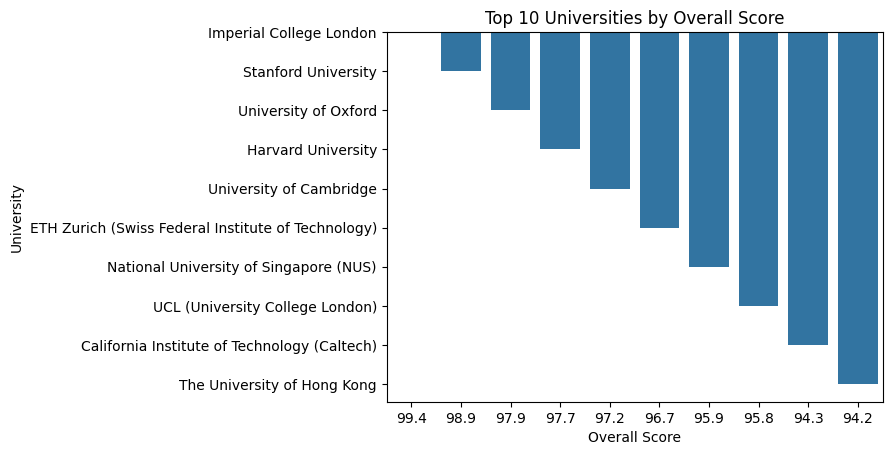

In [12]:
top10 = df.sort_values("Overall SCORE", ascending=False).head(10)

sns.barplot(
    x="Overall SCORE",
    y="Name",
    data=top10
)
plt.title("Top 10 Universities by Overall Score")
plt.xlabel("Overall Score")
plt.ylabel("University")
plt.show()


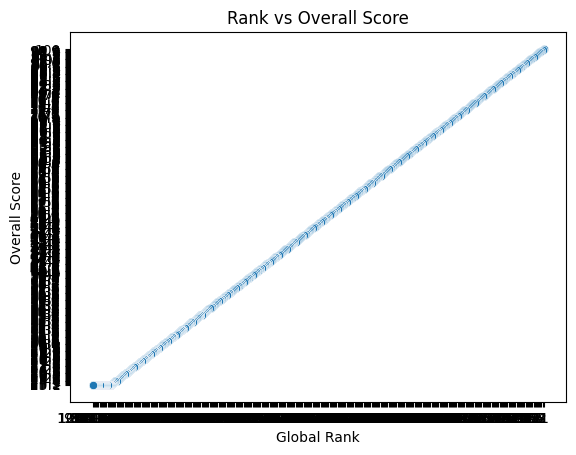

In [13]:
sns.scatterplot(
    x="Rank",
    y="Overall SCORE",
    data=df
)
plt.title("Rank vs Overall Score")
plt.xlabel("Global Rank")
plt.ylabel("Overall Score")
plt.gca().invert_xaxis()
plt.show()


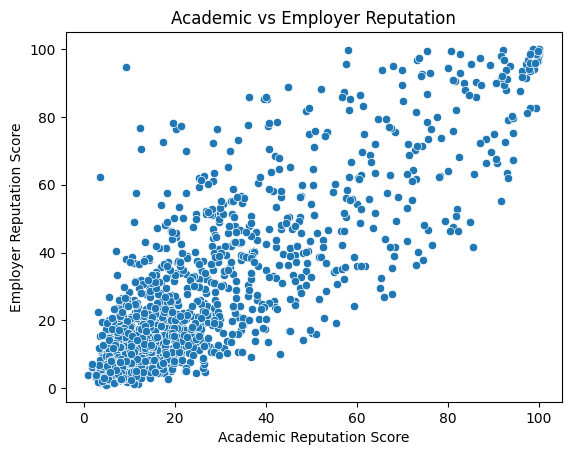

In [14]:
sns.scatterplot(
    x="Academic Reputation SCORE",
    y="Employer Reputation SCORE",
    data=df
)
plt.title("Academic vs Employer Reputation")
plt.xlabel("Academic Reputation Score")
plt.ylabel("Employer Reputation Score")
plt.show()


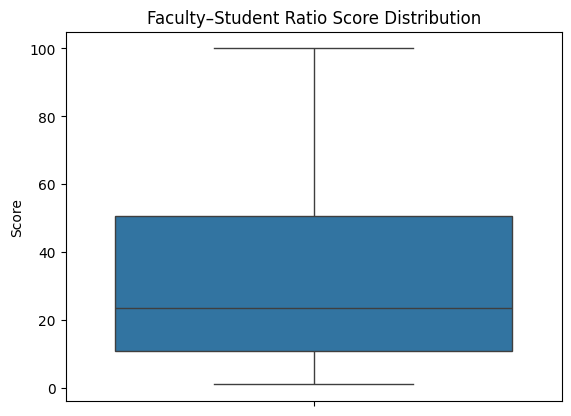

In [15]:
sns.boxplot(
    y="Faculty Student Ratio SCORE",
    data=df
)
plt.title("Faculty–Student Ratio Score Distribution")
plt.ylabel("Score")
plt.show()


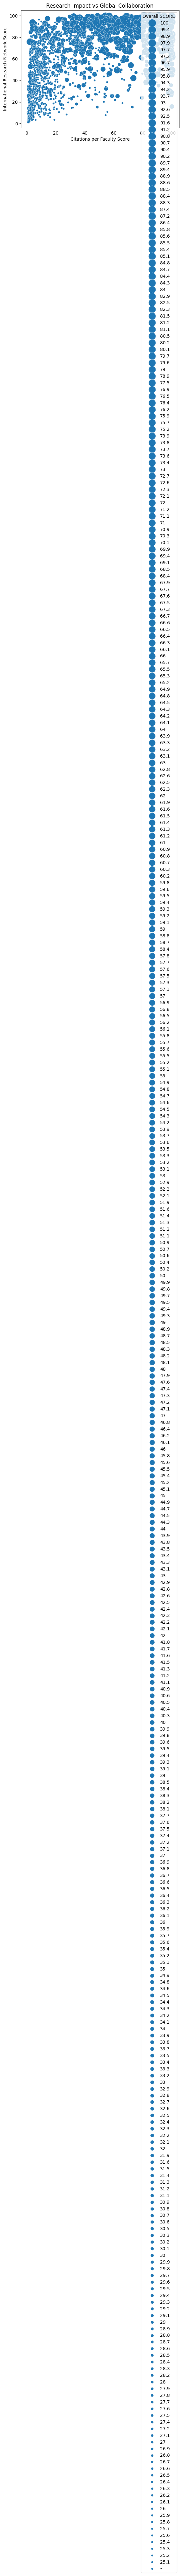

In [16]:
sns.scatterplot(
    x="Citations per Faculty SCORE",
    y="International Research Network SCORE",
    size="Overall SCORE",
    sizes=(20, 300),
    data=df
)
plt.title("Research Impact vs Global Collaboration")
plt.xlabel("Citations per Faculty Score")
plt.ylabel("International Research Network Score")
plt.show()


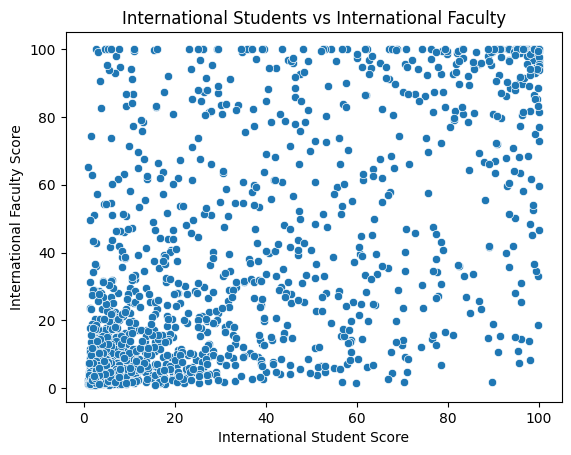

In [17]:
sns.scatterplot(
    x="International Student SCORE",
    y="International Faculty  SCORE",
    data=df
)
plt.title("International Students vs International Faculty")
plt.xlabel("International Student Score")
plt.ylabel("International Faculty Score")
plt.show()


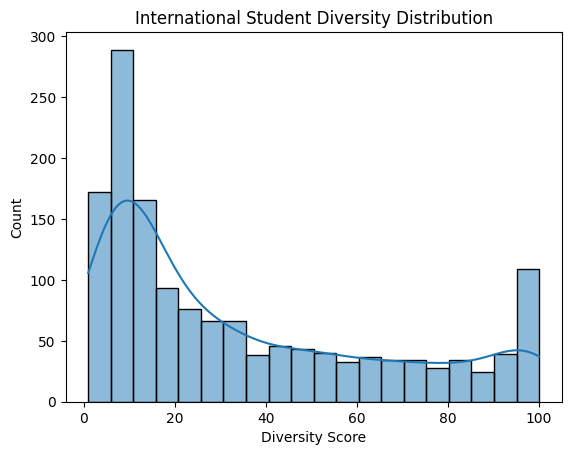

In [18]:
sns.histplot(
    df["International Students Diversity SCORE"],
    bins=20,
    kde=True
)
plt.title("International Student Diversity Distribution")
plt.xlabel("Diversity Score")
plt.ylabel("Count")
plt.show()


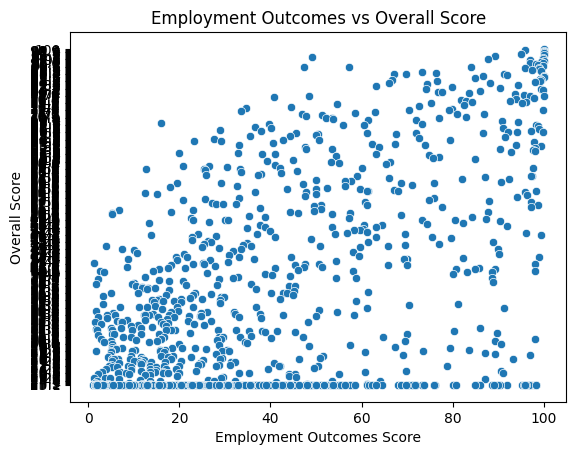

In [19]:
sns.scatterplot(
    x="Employment Outcomes SCORE",
    y="Overall SCORE",
    data=df
)
plt.title("Employment Outcomes vs Overall Score")
plt.xlabel("Employment Outcomes Score")
plt.ylabel("Overall Score")
plt.show()


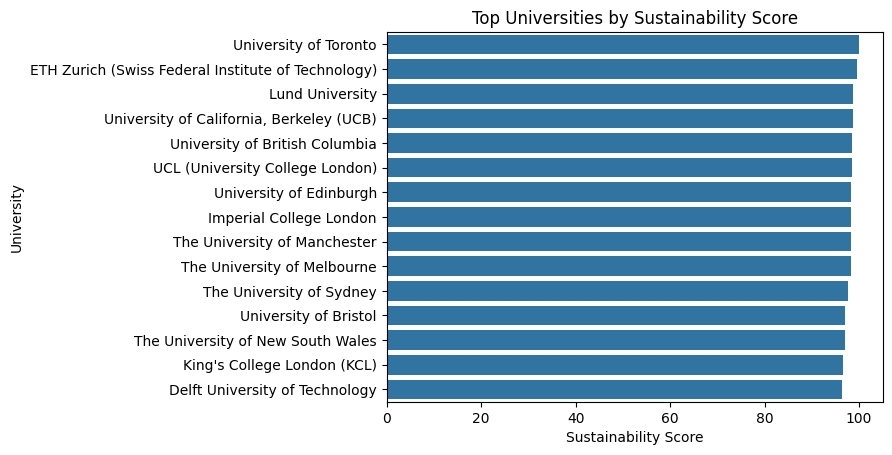

In [20]:
top_sustain = df.sort_values("Sustainability SCORE", ascending=False).head(15)

sns.barplot(
    x="Sustainability SCORE",
    y="Name",
    data=top_sustain
)
plt.title("Top Universities by Sustainability Score")
plt.xlabel("Sustainability Score")
plt.ylabel("University")
plt.show()


In [21]:
score_cols = [col for col in df.columns if "SCORE" in col]

for col in score_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[^0-9.]", "", regex=True)  # remove junk
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")


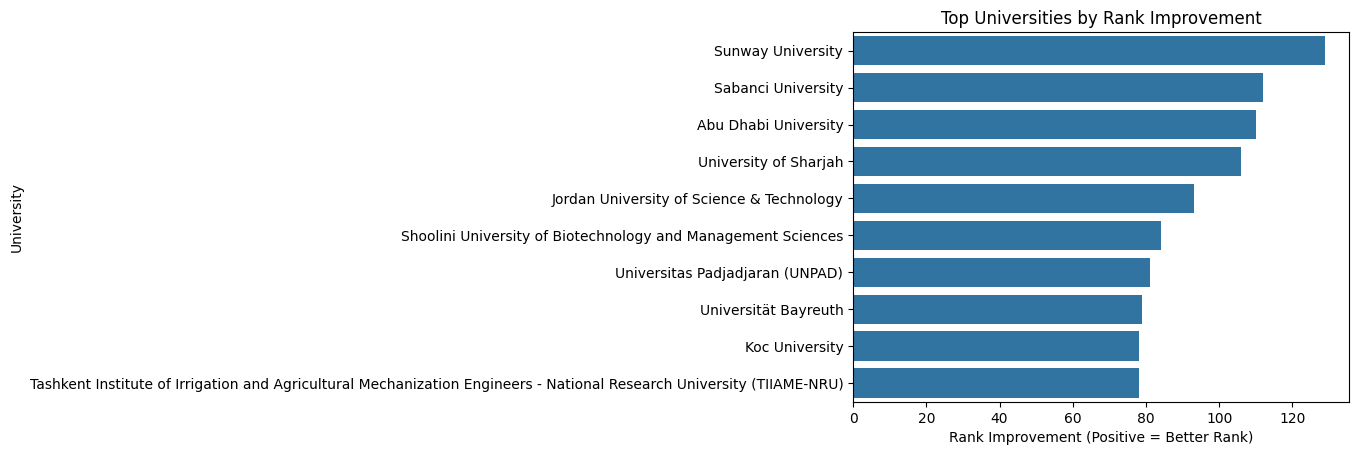

In [22]:
df["Rank"] = pd.to_numeric(df["Rank"], errors="coerce")
df["Previous Rank"] = pd.to_numeric(df["Previous Rank"], errors="coerce")
df["Rank Change"] = df["Previous Rank"] - df["Rank"]
df_rank_change = df.dropna(subset=["Rank Change"])



top_movers = df_rank_change.sort_values("Rank Change", ascending=False).head(10)

sns.barplot(
    x="Rank Change",
    y="Name",
    data=top_movers
)
plt.title("Top Universities by Rank Improvement")
plt.xlabel("Rank Improvement (Positive = Better Rank)")
plt.ylabel("University")
plt.show()


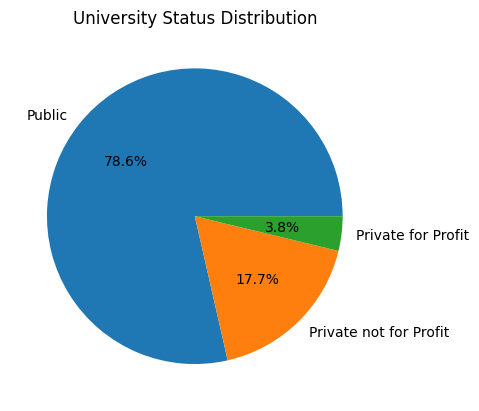

In [23]:
df["Status"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("University Status Distribution")
plt.ylabel("")
plt.show()


## Ml

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [25]:
score_cols = [col for col in df.columns if "SCORE" in col]

for col in score_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[^0-9.]", "", regex=True)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [26]:
df["Rank_Category"] = pd.qcut(
    df["Rank"].rank(method="first"),
    q=3,
    labels=["Low", "Medium", "High"]
)


In [27]:
features = [
    "Academic Reputation SCORE",
    "Employer Reputation SCORE",
    "Faculty Student Ratio SCORE",
    "Citations per Faculty SCORE",
    "International Faculty  SCORE",
    "International Student SCORE",
    "International Research Network SCORE",
    "Employment Outcomes SCORE",
    "Sustainability SCORE"
]

df_ml = df[features + ["Rank_Category"]].dropna()


In [28]:
le = LabelEncoder()
df_ml["Rank_Category"] = le.fit_transform(df_ml["Rank_Category"])


In [29]:
X = df_ml[features]
y = df_ml["Rank_Category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracy_results[name] = acc


In [32]:
accuracy_df = pd.DataFrame({
    "Model": accuracy_results.keys(),
    "Accuracy (%)": accuracy_results.values()
}).sort_values(by="Accuracy (%)", ascending=False)

accuracy_df


,Model,Accuracy (%)
0,Logistic Regression,96.753247
3,SVM,91.558442
2,Random Forest,88.961039
5,Naive Bayes,85.064935
1,Decision Tree,83.766234
4,KNN,80.519481


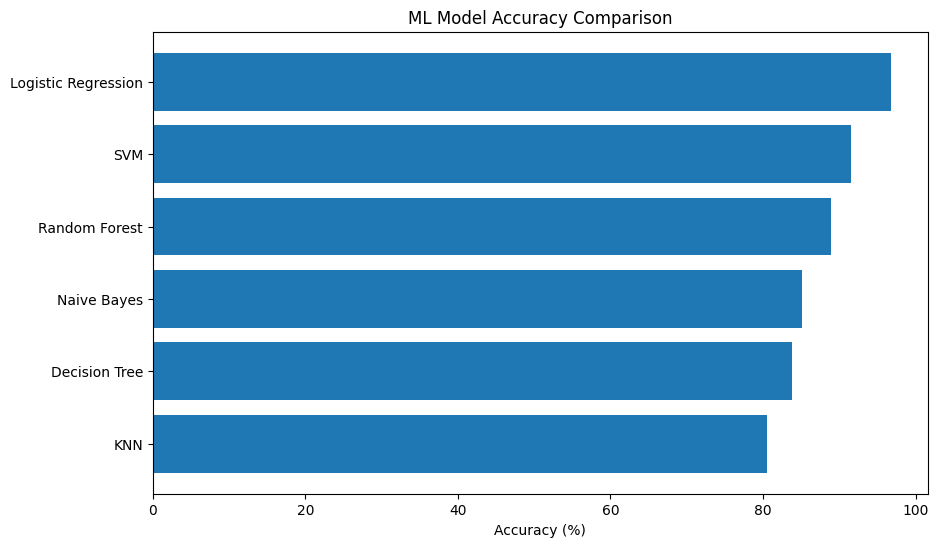

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(accuracy_df["Model"], accuracy_df["Accuracy (%)"])
plt.xlabel("Accuracy (%)")
plt.title("ML Model Accuracy Comparison")
plt.gca().invert_yaxis()
plt.show()


## Thank you...pls upvote!!!!